# Zero to Hero

## 1.04 Transformado (innecesariamente) las variables

El objetivo de esta sección es analizar el efecto que tiene sobre el arbol de decision
* Variables Colineales
* Normalizacion de Variables
* Transformada logarítmica
* Outliers

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("G:\\Documents\\ITBA\\Modulo3\\")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,556825,29.8,1176264,62.9,1035790,55.4
Vcells,1018468,7.8,8388608,64.0,1649740,12.6


Warning message:
"package 'data.table' was built under R version 4.1.1"
Warning message:
"package 'rpart' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"


In [2]:
dataset <- fread("./datasetsOri/paquete_premium_202011.csv")   #cargo el dataset

Warning message:
"cex and tweak both specified, applying both"


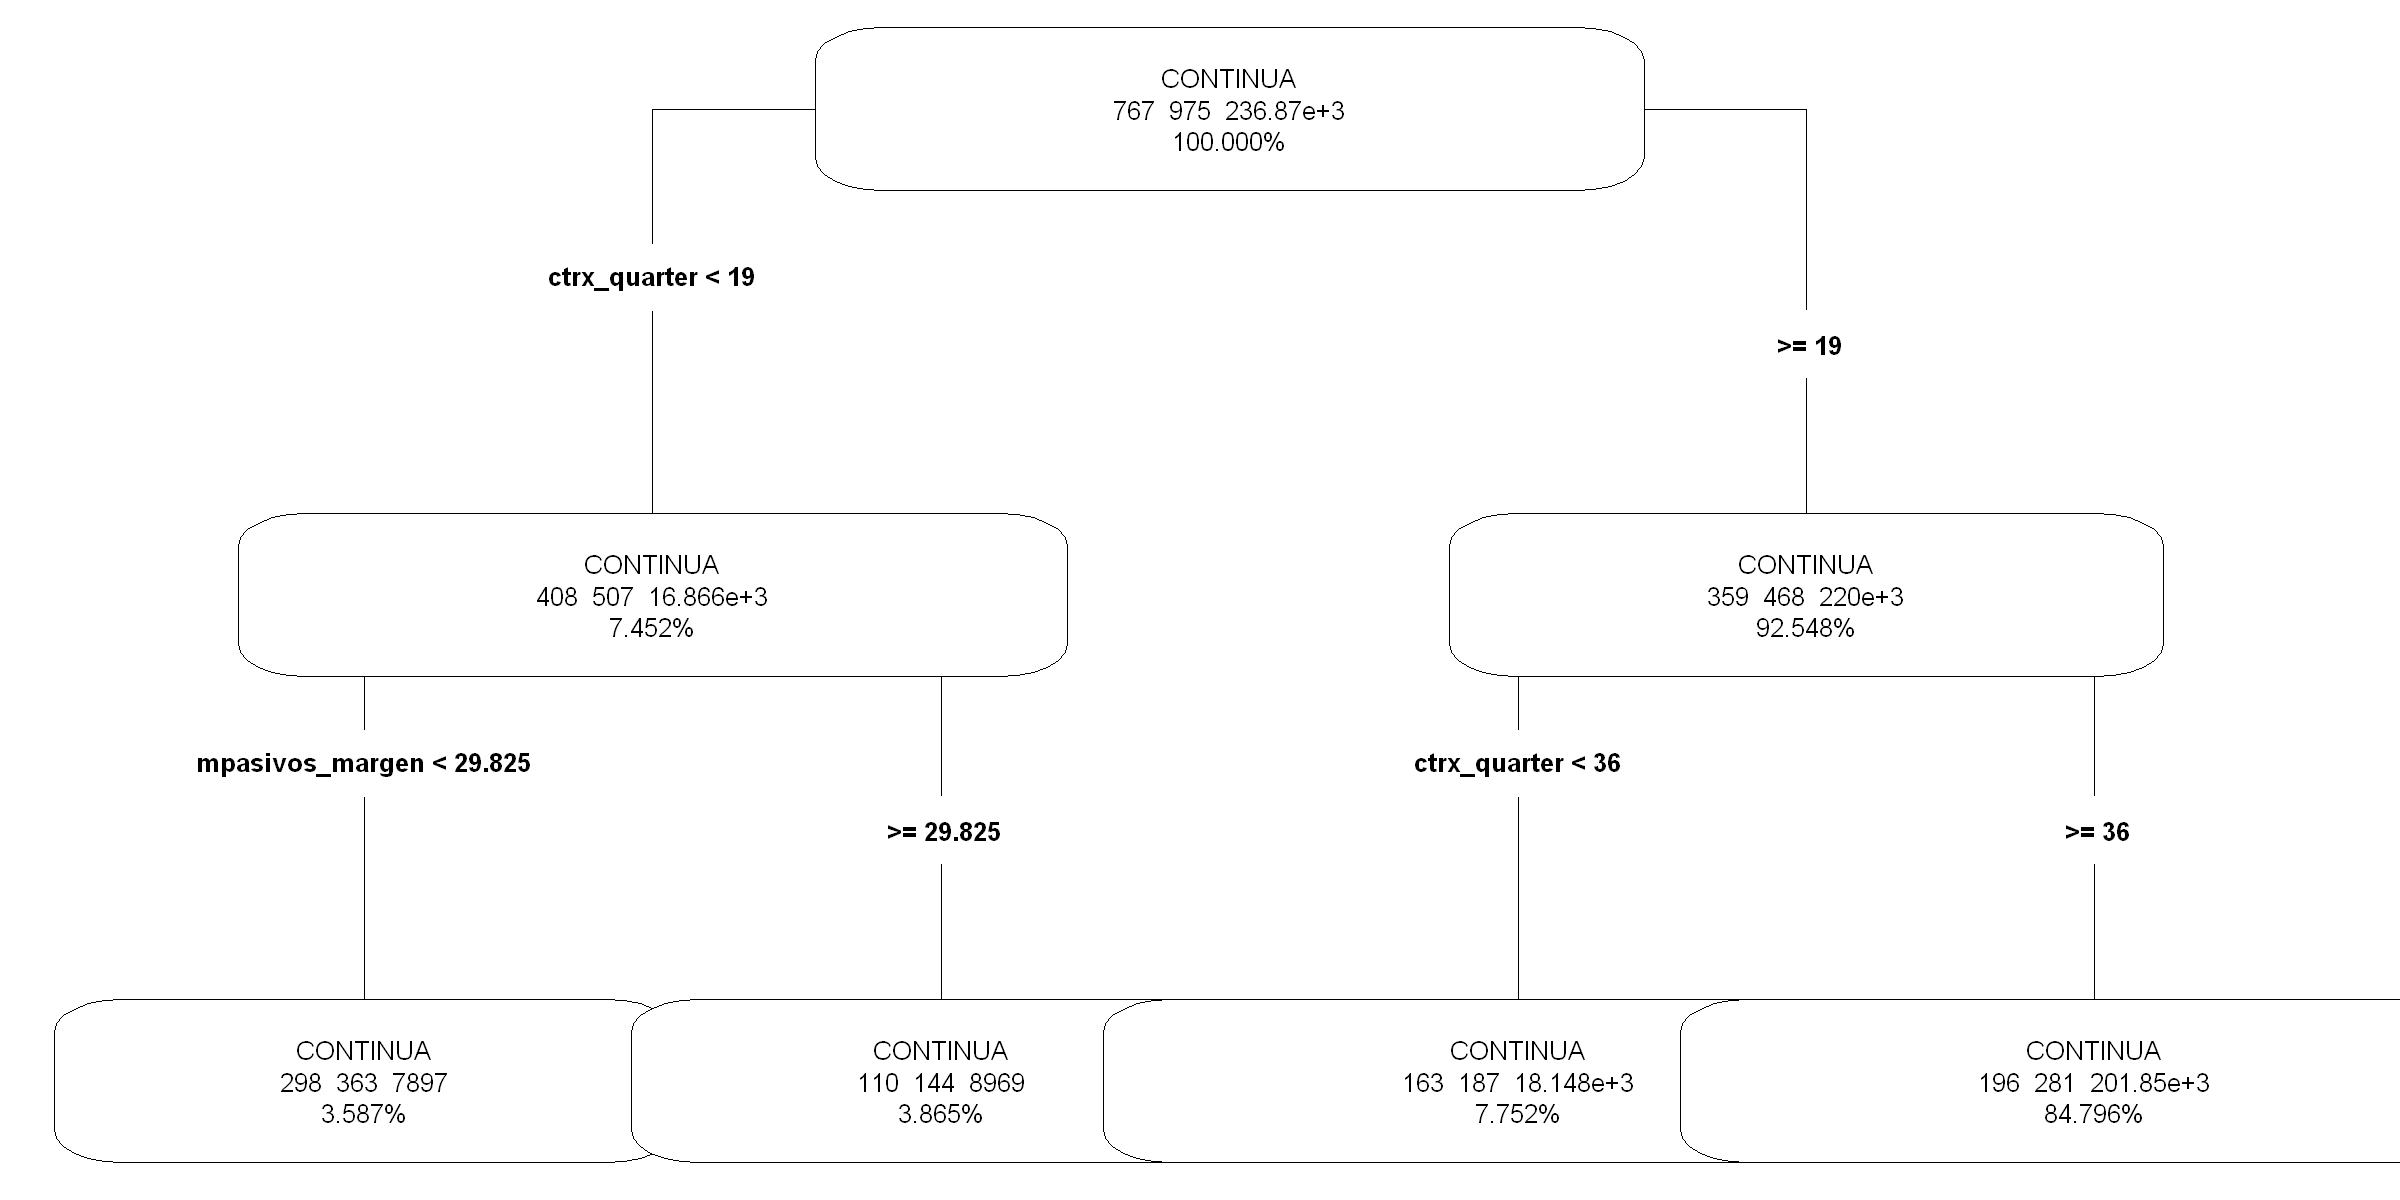

In [3]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

La variable mas importante que aparece es ctrx_quarter

### variables colineales

agrego al dataset tres variables colineales  con ctrx_quarter

In [4]:
dataset[  , ctrx_quarter_dos    :=  2*ctrx_quarter ]
dataset[  , ctrx_quarter_tres   :=  3*ctrx_quarter ]
dataset[  , ctrx_quarter_cuatro :=  4*ctrx_quarter ]

In [6]:
head(dataset)

numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,ctrx_quarter_dos,ctrx_quarter_tres,ctrx_quarter_cuatro
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
4572266,202011,1,0,0,48,98,-335.81,44318.28,-460.93,...,NA,NA,NA,NA,NA,NA,CONTINUA,108,162,216
4572285,202011,1,0,0,61,298,912.89,19300.64,1152.71,...,0.00,7805,14024.82,12,0,1977.3,CONTINUA,354,531,708
4572379,202011,1,0,0,68,318,1042.94,24318.78,1762.04,...,0.00,8660,9679.35,3,0,1778.4,CONTINUA,172,258,344
4572571,202011,1,0,0,48,172,1956.49,32177.44,459.72,...,0.00,5235,7220.38,5,0,0.0,CONTINUA,100,150,200
4572624,202011,1,0,0,58,318,2719.41,65947.67,3059.81,...,17.55,3968,33959.27,8,0,3065.4,CONTINUA,134,201,268
4572759,202011,1,0,0,79,371,1660.41,30989.34,1795.48,...,0.00,8545,34617.36,6,0,2410.2,CONTINUA,56,84,112


y vuelvo a correr el arbol de decision

Warning message:
"cex and tweak both specified, applying both"


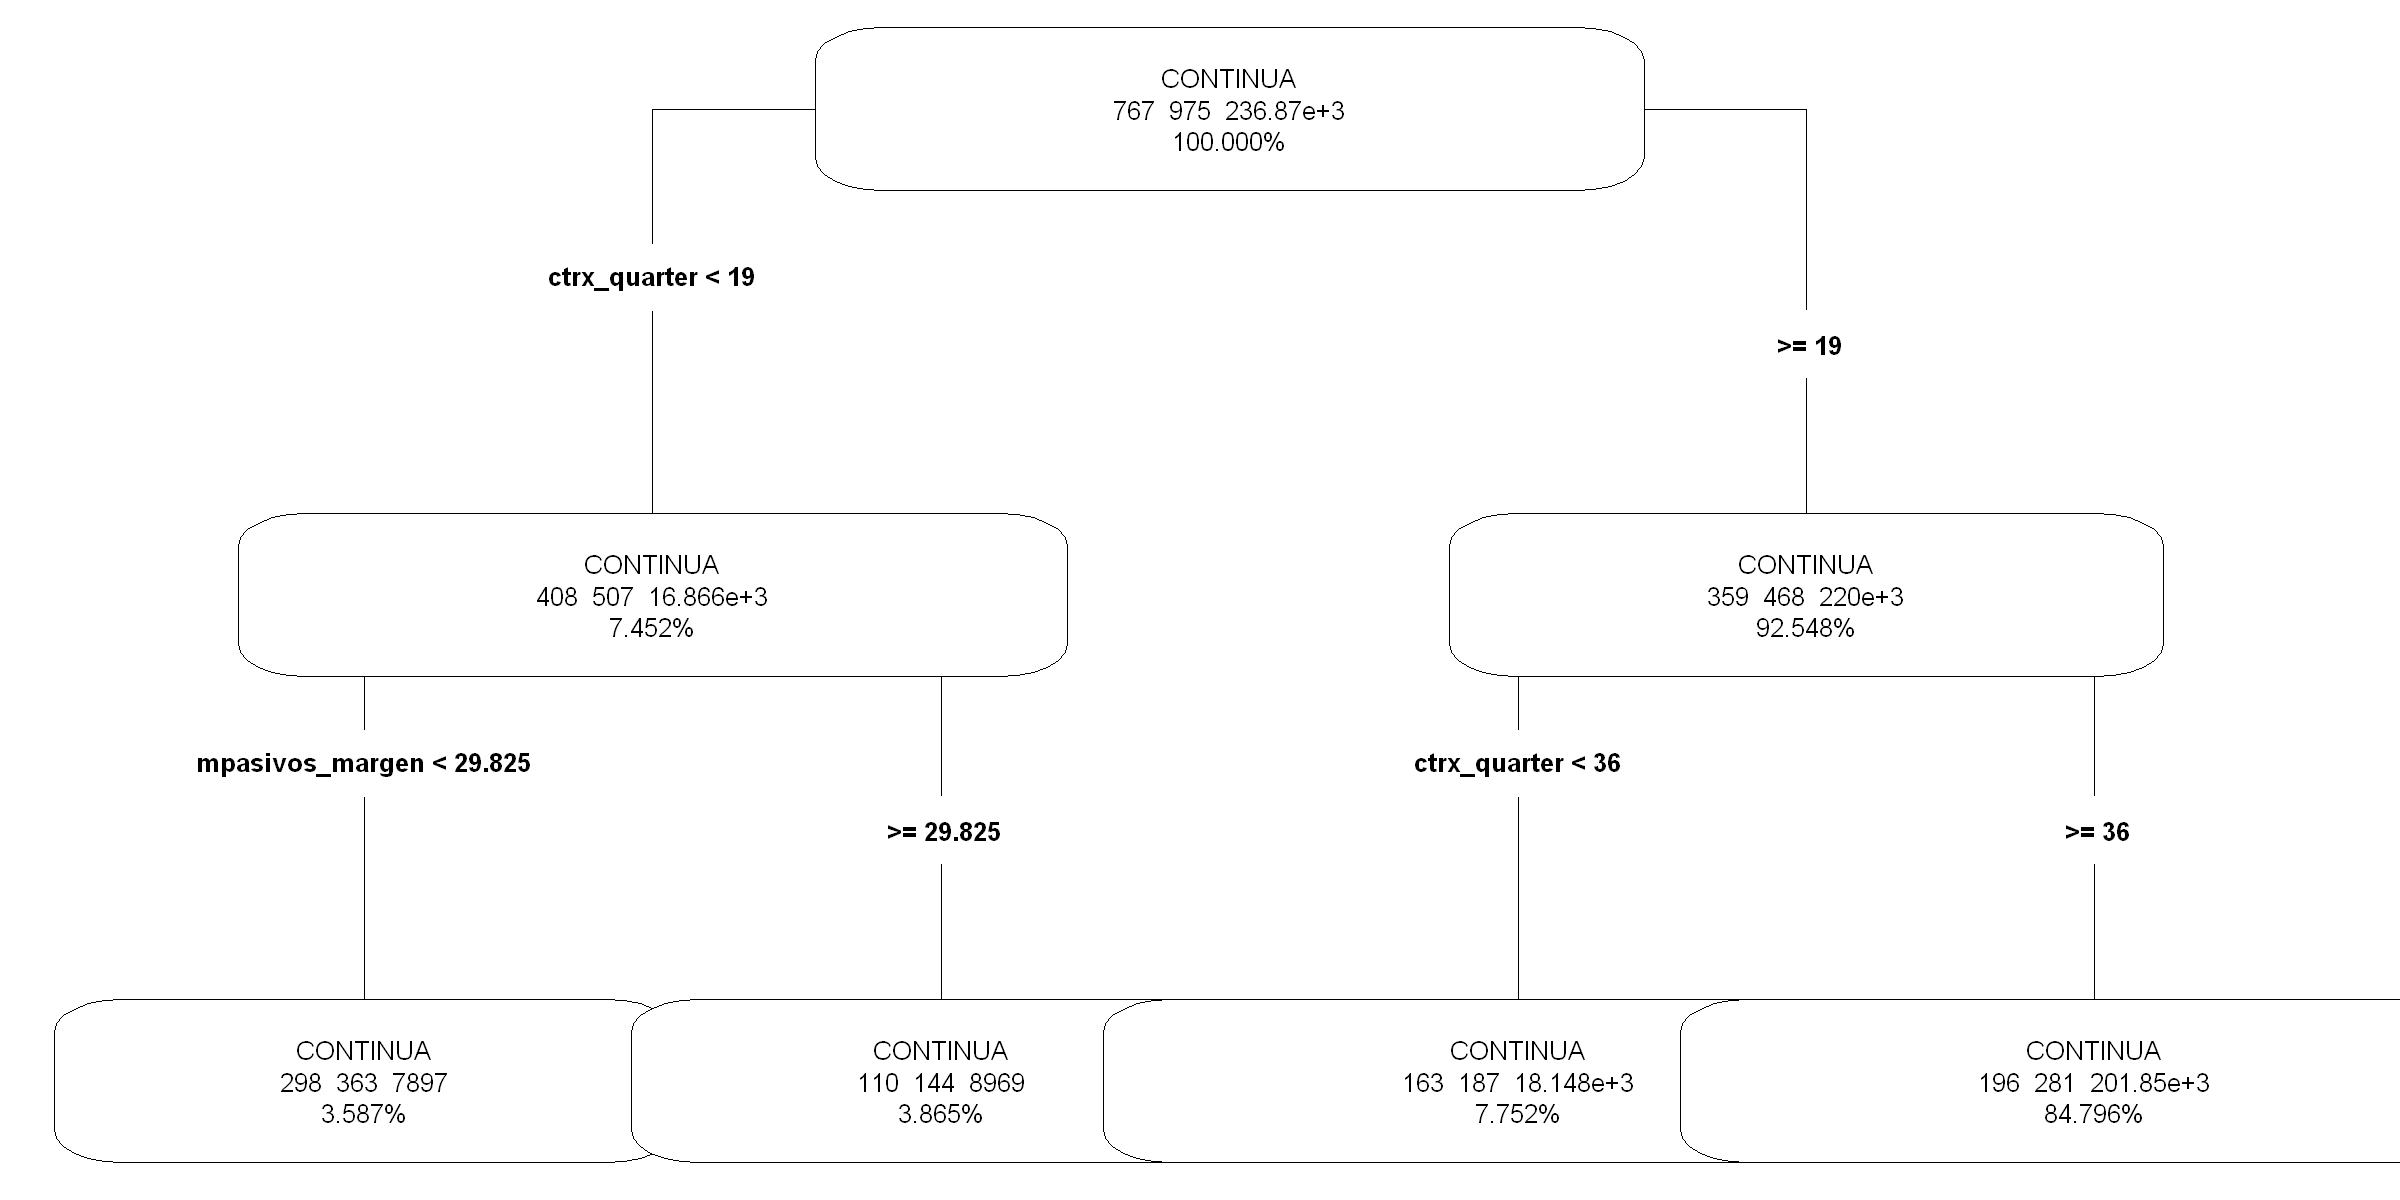

In [7]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a las colinearidad de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.

###  Normalizacion de variables

Analizo la variable  ctrx_quarter

In [8]:
min( dataset[ , ctrx_quarter] )

[1] 0

In [9]:
max( dataset[ , ctrx_quarter] )

[1] 2827

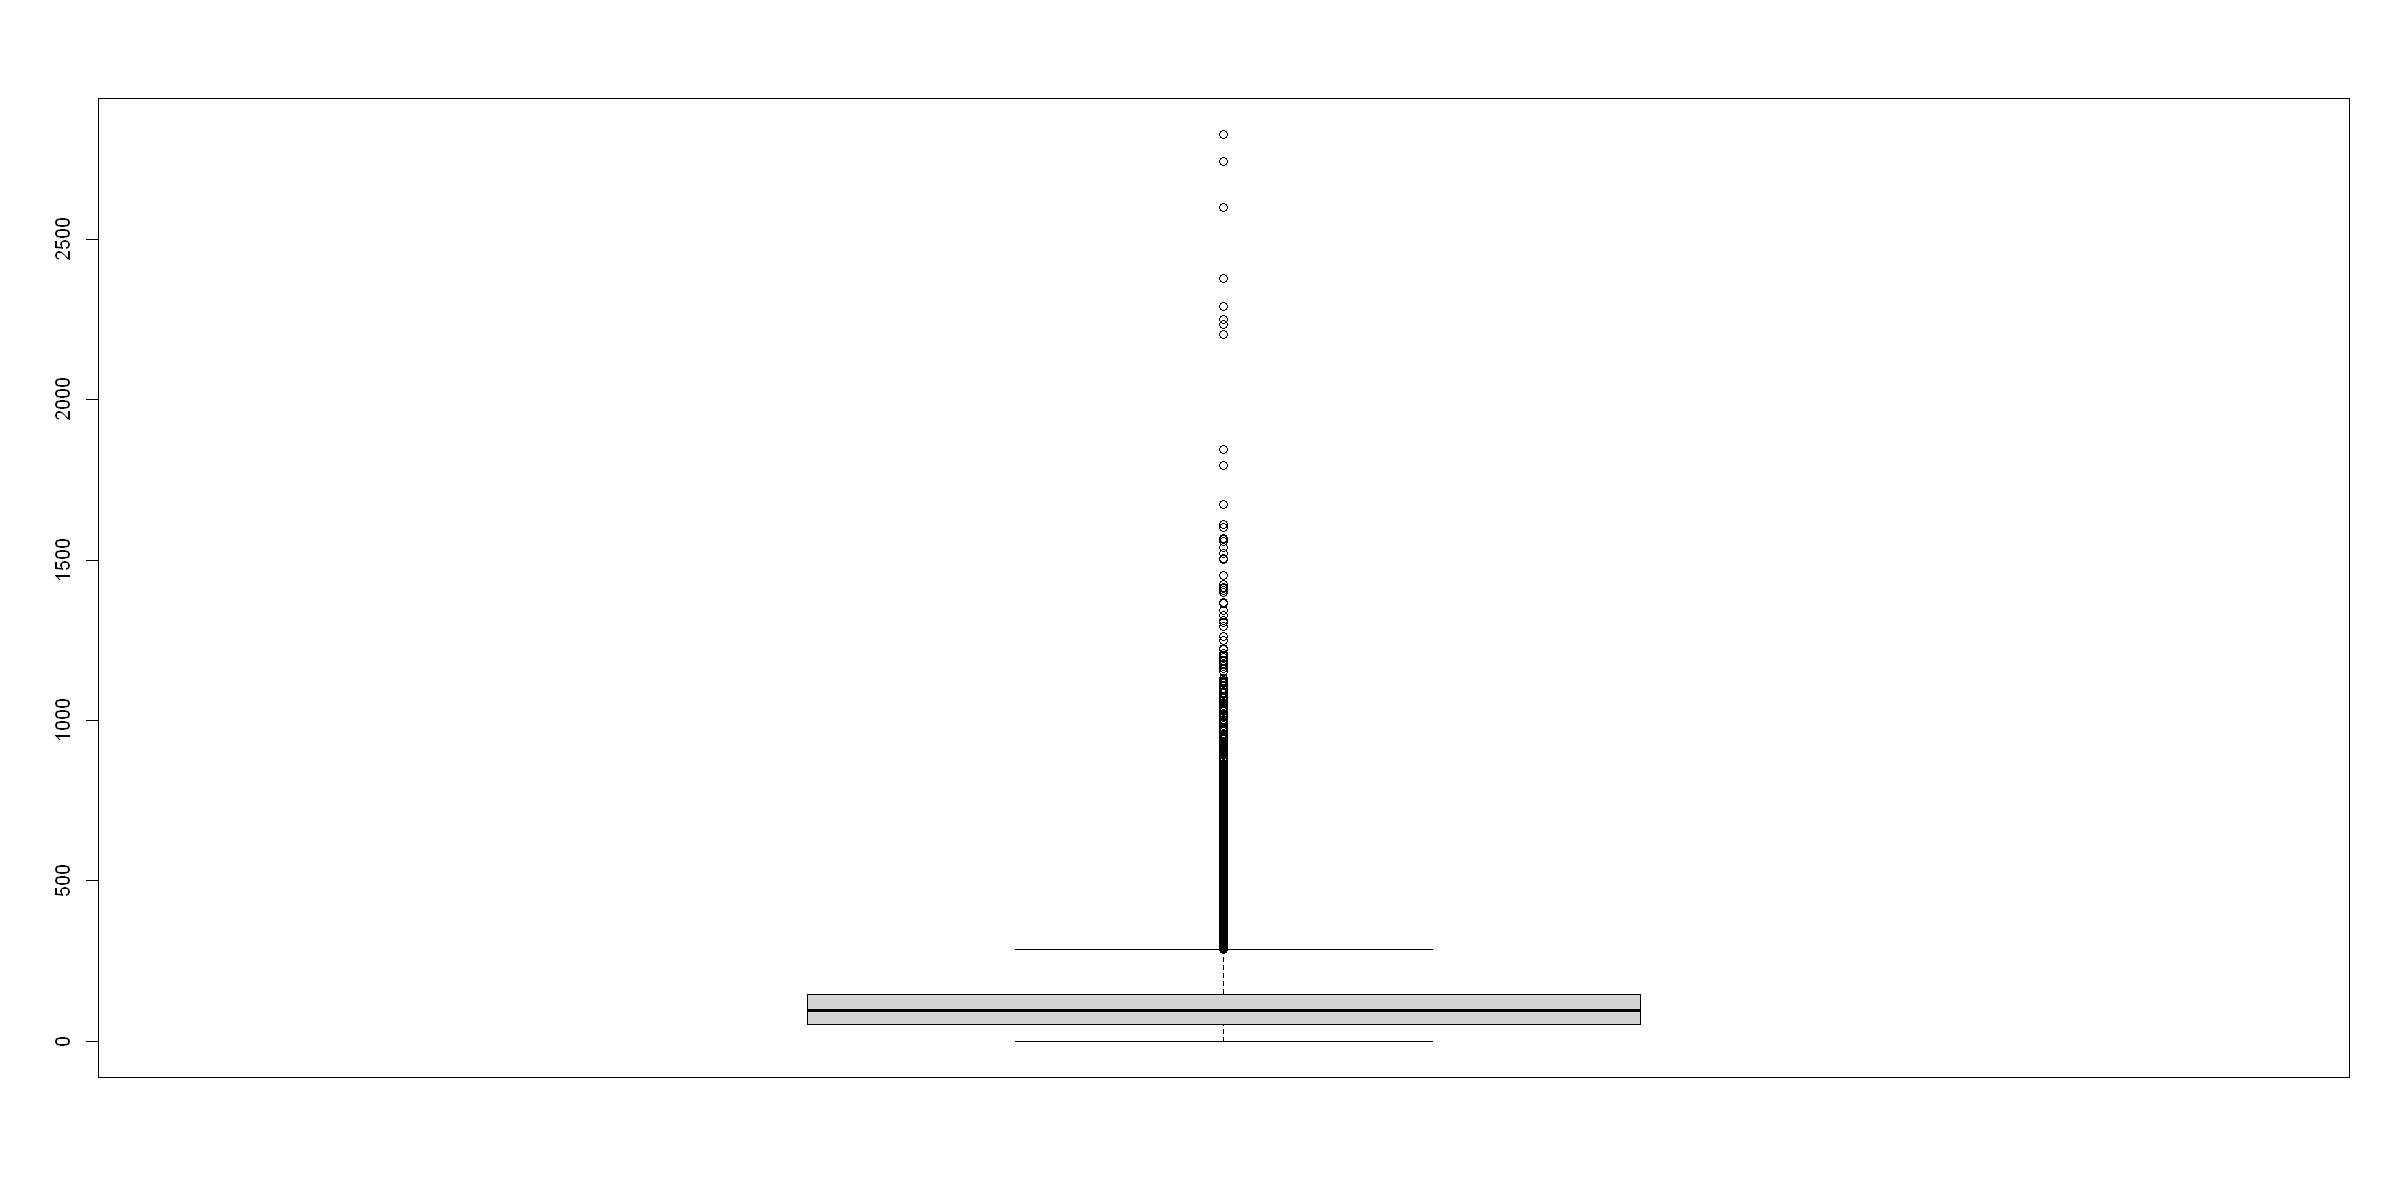

In [10]:
boxplot(  dataset[ , ctrx_quarter])

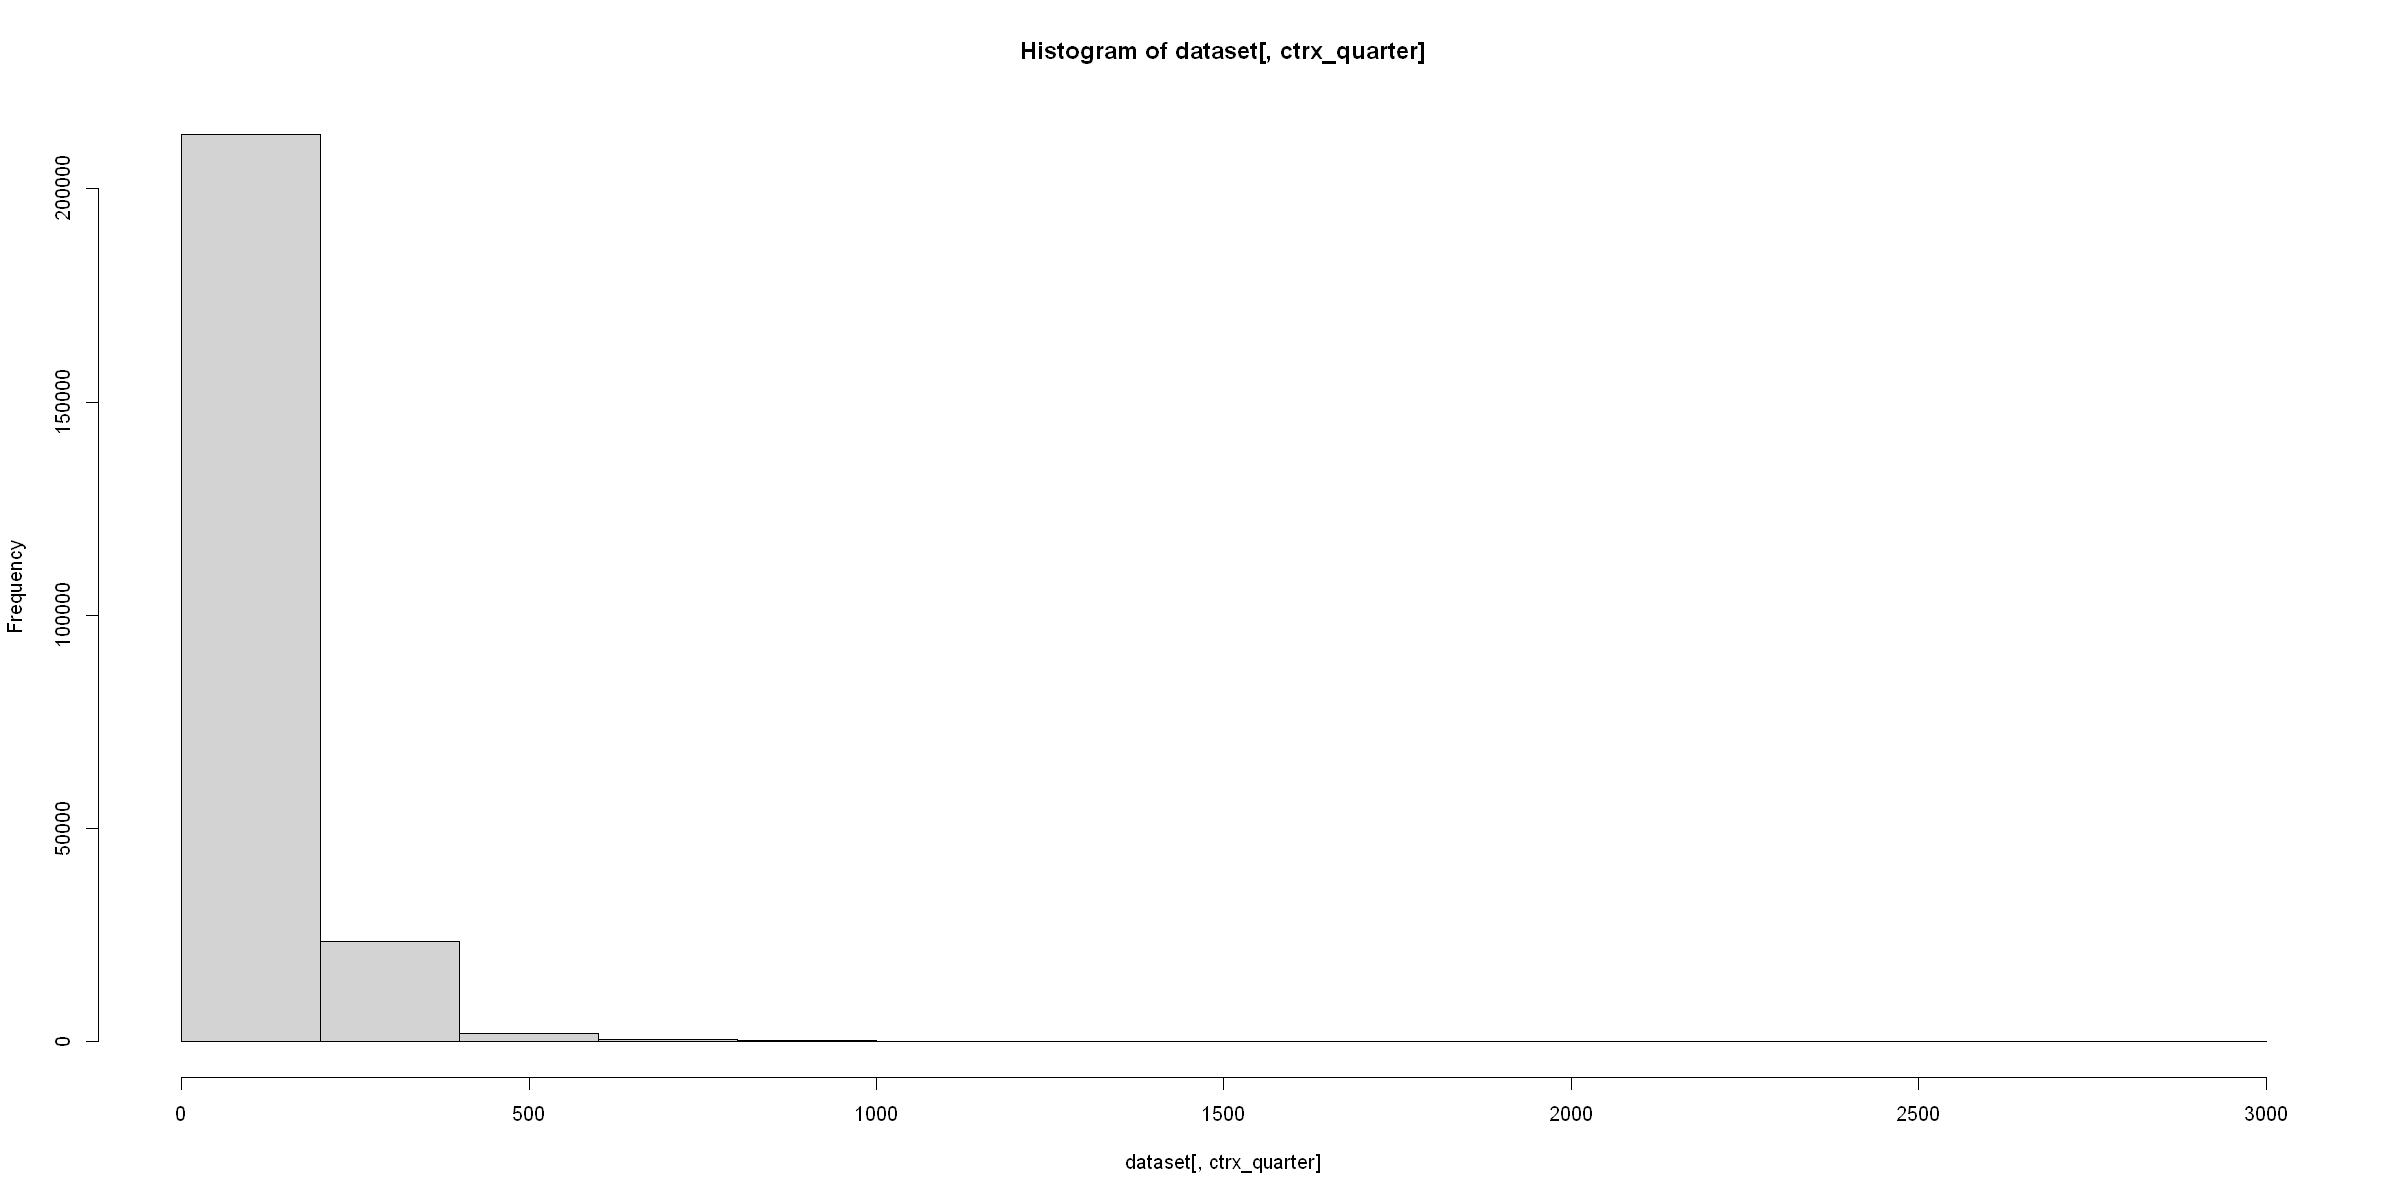

In [11]:
hist( dataset[, ctrx_quarter] )

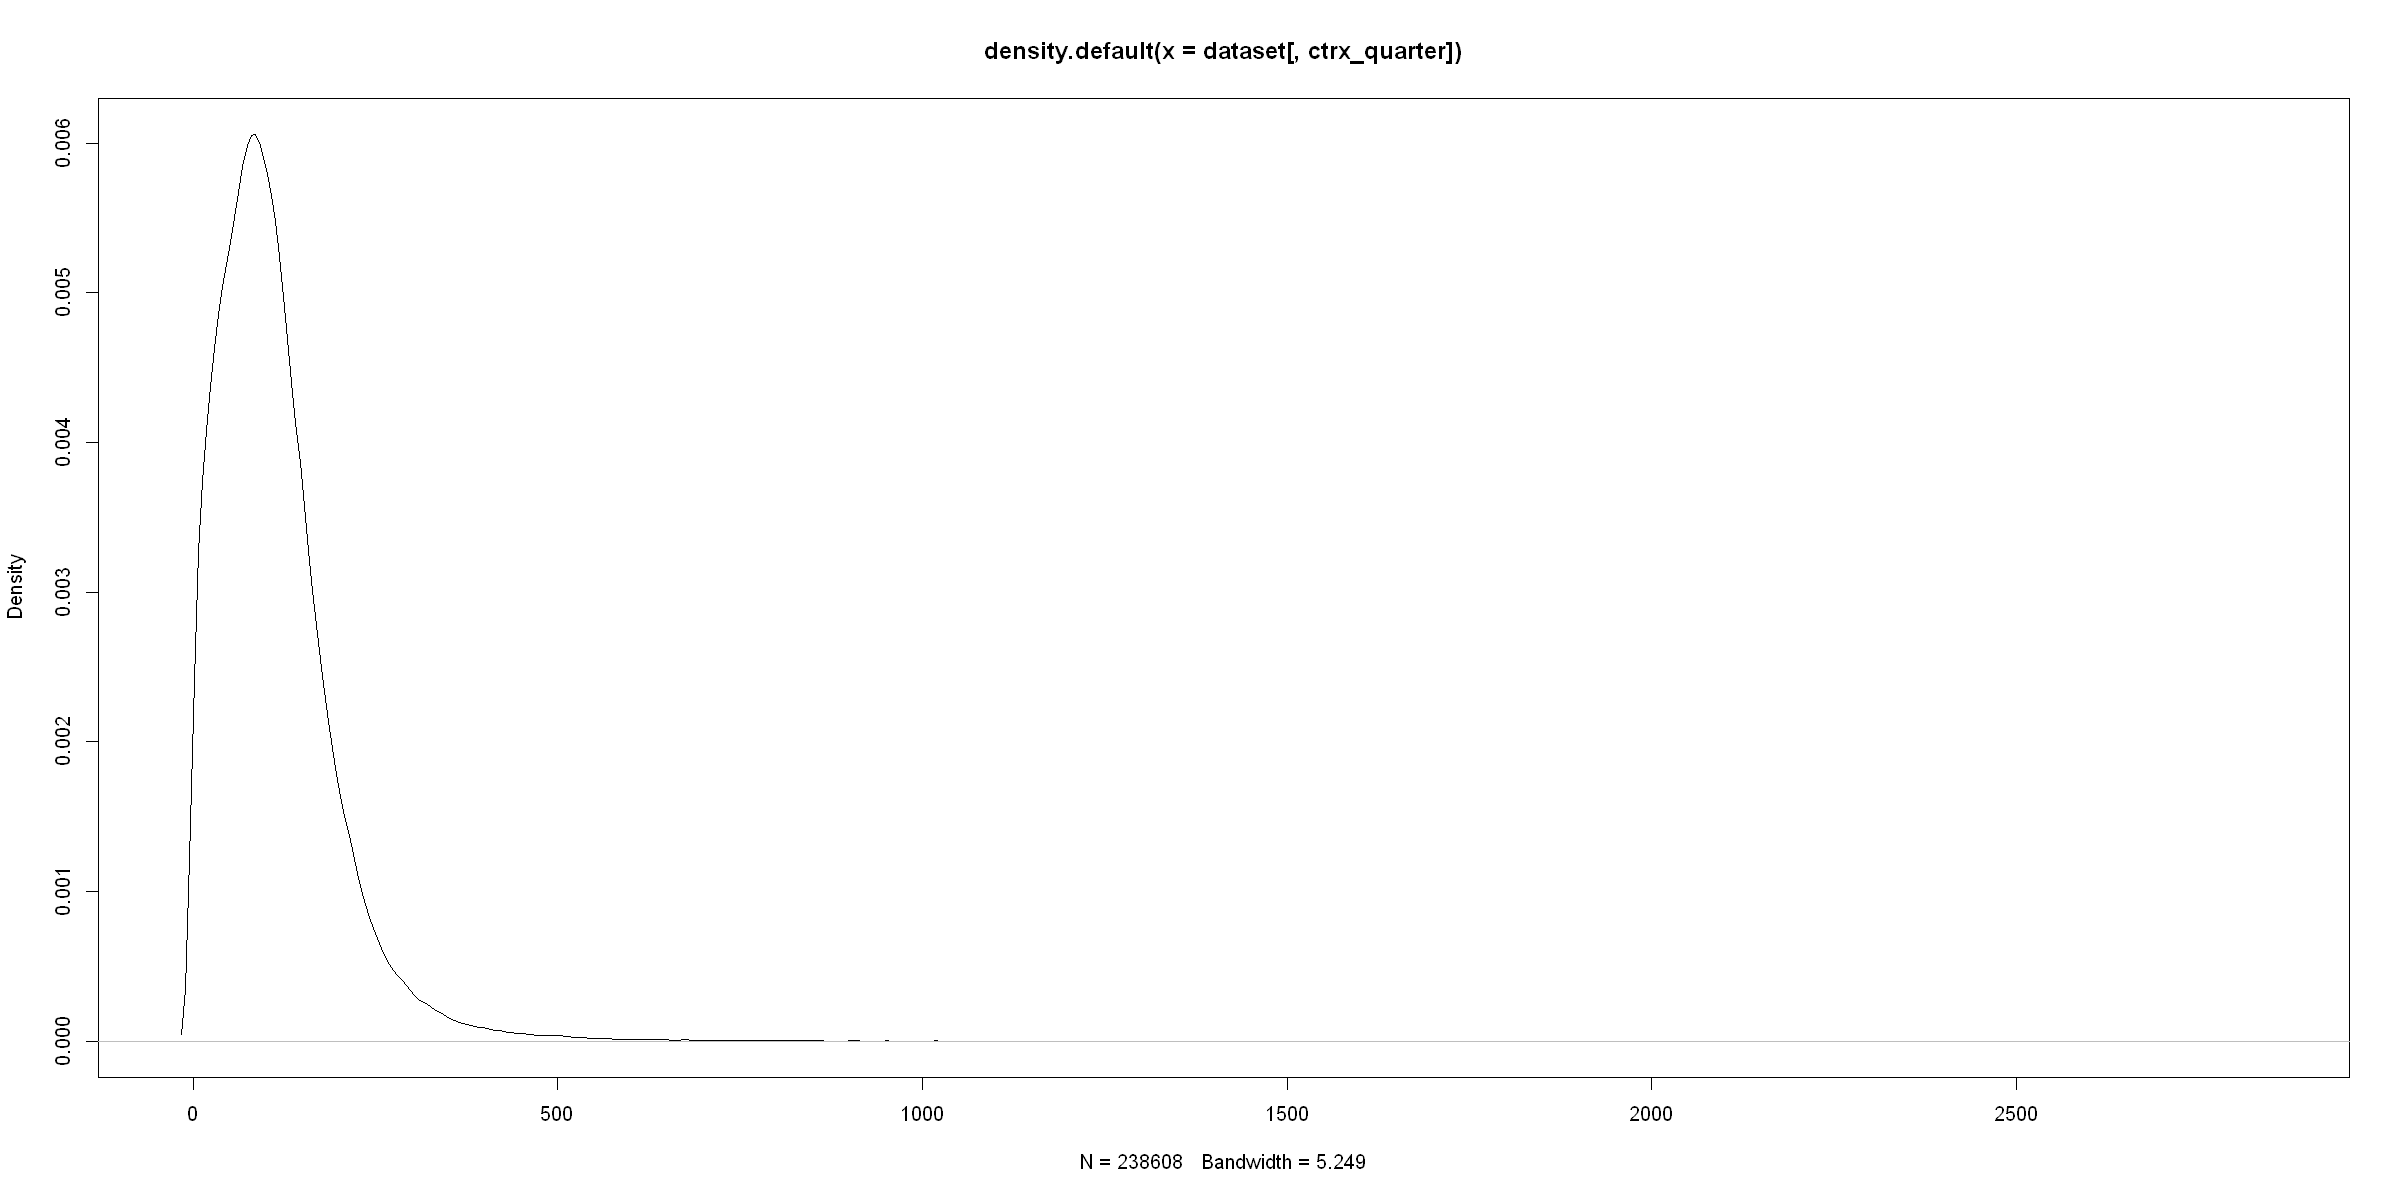

In [12]:
plot( density( dataset[, ctrx_quarter] ) )

Normailzo  ctrx_quarter

In [ ]:
dataset[ , ctrx_quarter := scale(ctrx_quarter)]

confirmo que me quedó normalizada

In [ ]:
plot( density( dataset[, ctrx_quarter] ) )

Confirmado, la variable está normalizada, ahora corremos nuevamente el arbol de decision

In [ ]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a las normalizacion de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 19 y ahora corta en ctrx_quarter < -1.0741 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.

### Transformación  logaritmica

Primero vuelvo a cargar el dataset

In [ ]:
dataset <- fread("./datasetsOri/paquete_premium_202011.csv")   #cargo el dataset

hago la transformación logarítmica

In [ ]:
dataset[ , ctrx_quarter :=log(ctrx_quarter+1)]  #sumo el uno poruqe no quiero infinitos

Ahora veo el boxplot

In [ ]:
boxplot(  dataset[ , ctrx_quarter])

In [ ]:
plot( density( dataset[, ctrx_quarter] ) )

Finalmente, el arbol de decision

In [ ]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a la transformada logaritmica**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 19 y ahora corta en ctrx_quarter < 2.9701 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.

### Outliers

Ahora fabrico outliers y veo como se comporta el arbol

Primero vuelvo a cargar el dataset

In [ ]:
dataset <- fread("./datasetsOri/paquete_premium_202011.csv")   #cargo el dataset

el boxplot original

In [ ]:
boxplot(  dataset[ , ctrx_quarter])

cuento cuantos registros hay con ctrx_quarter > 1500

In [ ]:
dataset[ ctrx_quarter > 1500, .N]

Ahora, a esos 21 valores los transformo en outliers extremos

In [ ]:
dataset[ ctrx_quarter > 1500,  ctrx_quarter := ctrx_quarter * 1000]

compruebo que sean outliers extremos

In [ ]:
boxplot(  dataset[ , ctrx_quarter])

Finalmente, nuevamente arbol de decision

In [ ]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE, el arbol de decision es inmune a los outliers**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 19 y ahora corta en ctrx_quarter < 2.9701 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.